# Efficient Frontier Part II

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

In [2]:
def portfolio_return(wieghts, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns
def portfolio_vol(weights, covmat):
    """
    Weights -> Volatility
    """
    return (weights.T @ covmat @ weights)**0.5

In [3]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [6]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [12]:
import numpy as np
weights = np.repeat(1/4,4)

In [14]:
erk.portfolio_return(weights,er[l])

0.19511097196038385

In [15]:
erk.portfolio_vol(weights,cov.loc[l,l])

0.055059195776437045

## Two Asset Frontier

In [16]:
l = ["Games", "Fin"]

In [18]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0,1, n_points)]

In [19]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [20]:
len(weights)

20

In [21]:
l

['Games', 'Fin']

<AxesSubplot:xlabel='Vol', ylabel='R'>

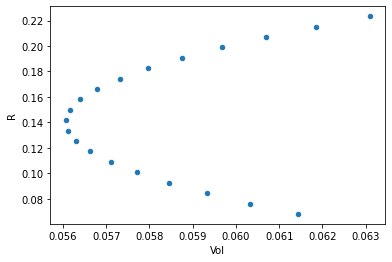

In [24]:
rets = [erk.portfolio_return(w,er[l]) for w in weights]
vols = [erk.portfolio_vol(w,cov.loc[l,l]) for w in weights]
import pandas as pd
ef = pd.DataFrame({"R": rets, "Vol":vols})
ef.plot.scatter(x="Vol",y="R")

<AxesSubplot:xlabel='Volatility'>

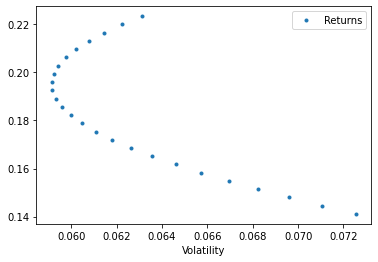

In [29]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l], cov.loc[l,l], style=".")